#  Final  Project of ML

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 1. Explore of data

In [18]:
data = pd.read_csv('data/raw/data.csv')
print(f'The dataset has {data.shape[0]} rows and {data.shape[1]} columns.')
print(data.columns)
data.head()

The dataset has 6819 rows and 96 columns.
Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Prof

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [ ]:
print(f'The dataset has {data.isna().sum().sum()} null values.')
print(f'The dataset has {data.duplicated().sum()} duplicate rows.')
cat_cols = [col for col in data.columns if data[col].dtypes != 'float64']
col_dtypes = [data[col].dtypes for col in cat_cols]
print(f'dtypes of {cat_cols} are as follows: {col_dtypes}')
print('dtypes of other columns are float64.')

The dataset has 0 null values.
The dataset has 0 duplicate rows.
dtypes of ['Bankrupt?', ' Liability-Assets Flag', ' Net Income Flag'] are as follows: [dtype('int64'), dtype('int64'), dtype('int64')]
dtypes of other columns are float64.


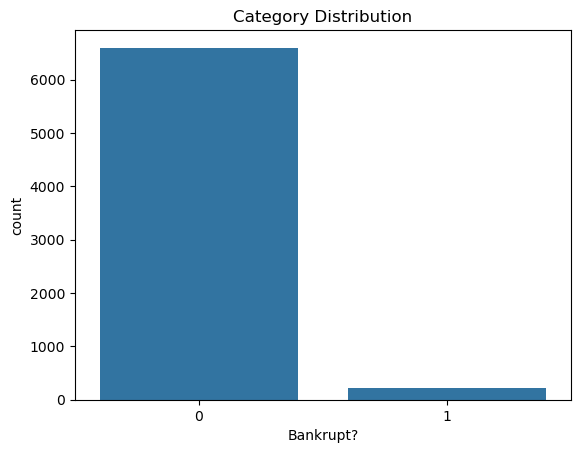

不平衡比例: 30.00:1
少数类样本数：220
少数类占比: 3.23%


In [104]:
# 条形图显示y标签的类别分布
sns.countplot(x=data['Bankrupt?'])
plt.title('Category Distribution')
plt.show()

distribution = pd.Series(data['Bankrupt?']).value_counts()                  # 计算不平衡比例

imbalance_ratio = distribution.max() / distribution.min()
print(f"不平衡比例: {imbalance_ratio:.2f}:1")
print(f'少数类样本数：{distribution.min()}')
minority_percentage = distribution.min() / len(data['Bankrupt?']) * 100     # 计算少数类占比
print(f"少数类占比: {minority_percentage:.2f}%")

## 2. Feature Selection

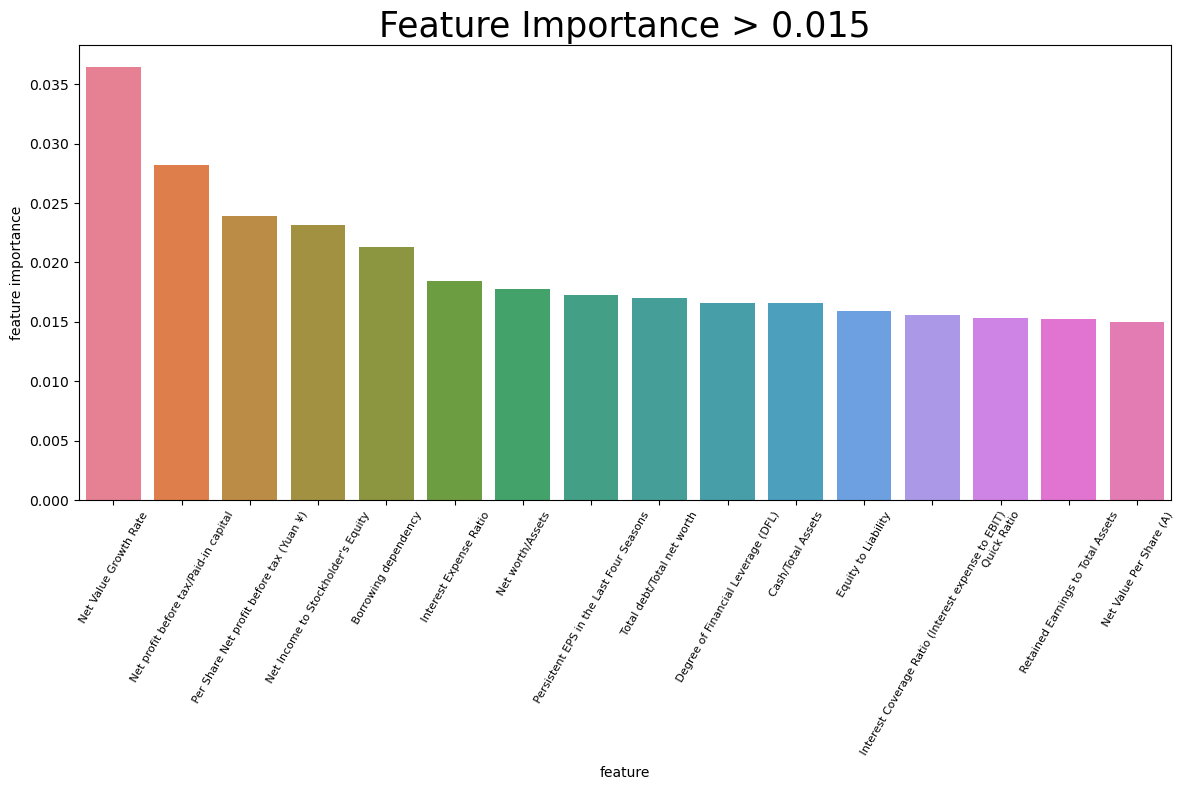

In [ ]:
'''
computing the feature importances by means of a random forest classifier
特征选择方法一：使用随机森林分类器计算特征重要性
'''
from sklearn.ensemble import RandomForestClassifier

X = data.drop('Bankrupt?', axis=1)
y = data['Bankrupt?']
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X, y)

sorted_idx = (-rf.feature_importances_).argsort()               # 对重要度取负用于降序排序

list_of_tuples = list(zip(X.columns[sorted_idx],                # 将特征名和重要度打包成元组
                          rf.feature_importances_[sorted_idx]))

feat_importance = pd.DataFrame(list_of_tuples,
                  columns=['feature', 'feature importance'])

fig = plt.figure(figsize=(12,8))

fig = sns.barplot(data=feat_importance[feat_importance['feature importance'] > 0.015], x='feature', hue= 'feature', legend=False, y='feature importance', palette='husl')
plt.title('Feature Importance > 0.015',fontsize=25)
plt.xticks(fontsize=8,rotation=60)

plt.tight_layout()

C:\Users\Chill\AppData\Local\Temp\ipykernel_44260\880470611.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, size=7)


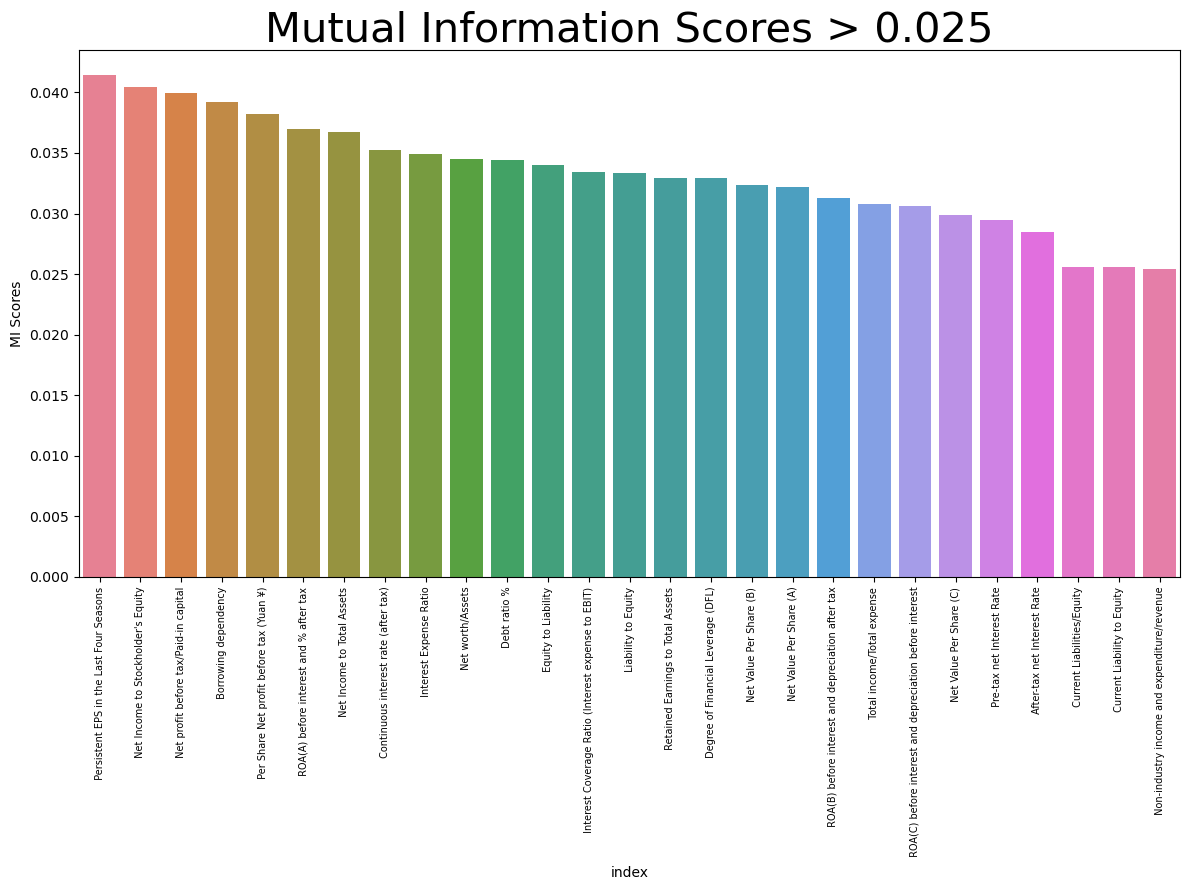

In [ ]:
'''
Calculate the mutual information between each feature and the target variable
特征选择方法二:计算各特征和目标变量之间的互信息
'''
from sklearn.feature_selection import mutual_info_classif

discrete_features = X.dtypes == int
mutual_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
mutual_scores = pd.Series(mutual_scores, name="MI Scores", index=X.columns)
mutual_scores = mutual_scores.sort_values(ascending=False)      # 降序排序
mutual_scores = mutual_scores.reset_index()

ax = plt.figure(figsize=(12,9))

ax = sns.barplot(data=mutual_scores[mutual_scores['MI Scores'] > 0.025], x='index', y='MI Scores', hue='index', legend=False, palette='husl')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, size=7)
ax.set_title('Mutual Information Scores > 0.025', size=30)

plt.tight_layout()

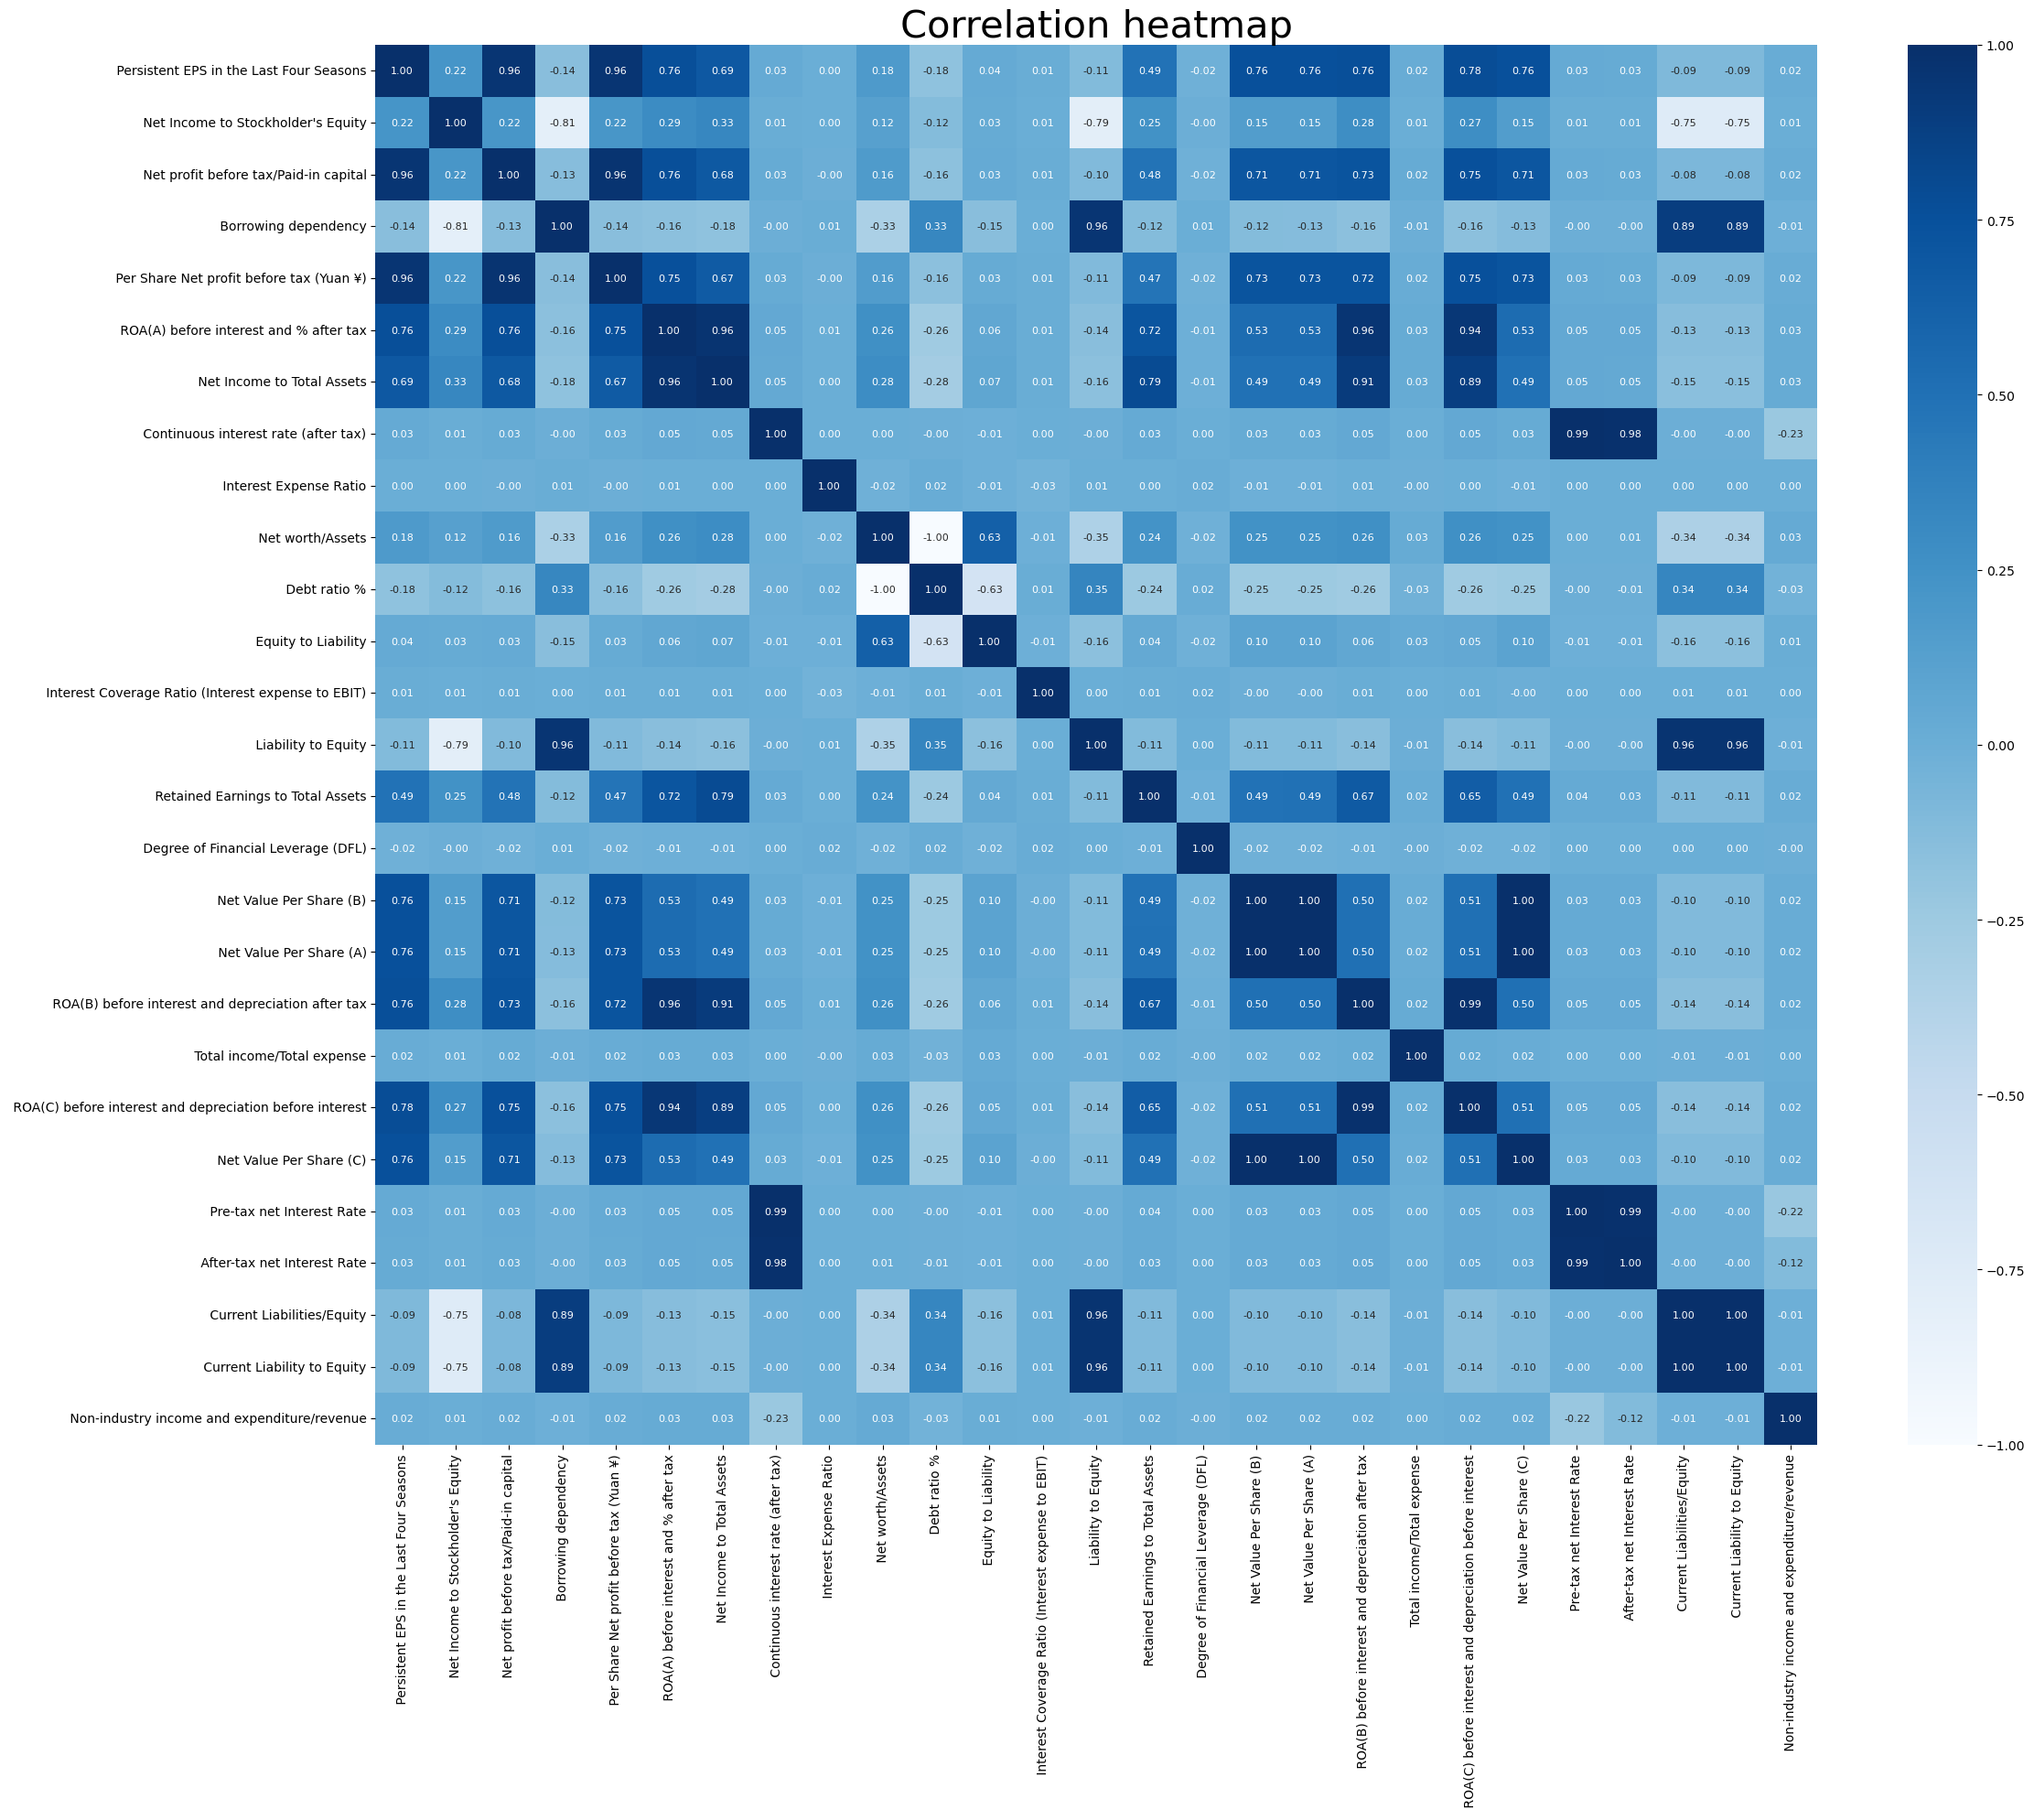

In [ ]:
'''
Further draw the correlation heat map for the features with higher mutual information values
为互信息值较高的特征进一步绘制相关性热图
'''
col_0025 = mutual_scores[mutual_scores['MI Scores'] > 0.025]['index'].tolist()
plt.figure(figsize=(24,20))
sns.heatmap(X[col_0025].corr(method='pearson'),annot=True,fmt='.2f',annot_kws={"fontsize":8},cmap='Blues')  # col_0025为互信息值大于0.025的特征列表
plt.title('Correlation heatmap',fontsize=30)

plt.tight_layout()
plt.show()

In [ ]:
'''
Filter the pair of features whose correlation exceeds the threshold
对一组已经选择的特征，将相关性超过阈值的一对特征进行筛选，同时保留互信息值较大的特征，
函数输出筛选后的特征名列表
'''
def filter_corr(col_list:list):
    corr = X[col_list].corr(method='pearson').values
    rows, cols = corr.shape
    columns = X[col_list].columns.tolist()
    col_to_drop = []    
    threshold = 0.9                                 # 相关性阈值        
    for i in range(rows):
        for j in range(i+1, cols):
            if abs(corr[i][j]) > threshold: 
                # print(f'correlation between {columns[i]} and {columns[j]} is {corr[i][j]}')
                mutual_scores_i = float(mutual_scores[mutual_scores['index'] == columns[i]]['MI Scores'].iloc[0])
                mutual_scores_j = float(mutual_scores[mutual_scores['index'] == columns[j]]['MI Scores'].iloc[0])       
                if mutual_scores_i < mutual_scores_j:
                    col_to_drop.append(columns[i])
                else:
                    col_to_drop.append(columns[j])
    col_to_drop = list(set(col_to_drop))  # 去重
    # print('The number of features after filtering is', len(col_list) - len(col_to_drop))
    col_keep = list(set(col_list) - set(col_to_drop))  # 保留互信息值较大的特征
    return col_keep



print(filter_corr(col_0025))


[' ROA(A) before interest and % after tax', ' Net Value Per Share (B)', ' Net worth/Assets', ' Persistent EPS in the Last Four Seasons', " Net Income to Stockholder's Equity", ' Equity to Liability', ' Non-industry income and expenditure/revenue', ' Interest Coverage Ratio (Interest expense to EBIT)', ' Degree of Financial Leverage (DFL)', ' Continuous interest rate (after tax)', ' Total income/Total expense', ' Borrowing dependency', ' Interest Expense Ratio', ' Retained Earnings to Total Assets']


## 3. Classification

In [ ]:
'''
Construct an evaluation table, including metrics such as precision, recall, f1, and accuracy
构建评价表格,包括precision, recall, f1, accuracy等指标
'''
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix

def get_test_scores(model_name:str,preds,y_test_data):
    '''
    输入模型名称，预测值和测试集标签，输出混淆矩阵和评价表格
    '''
    accuracy  = accuracy_score(y_test_data,preds)
    precision = precision_score(y_test_data,preds,average='weighted')
    recall    = recall_score(y_test_data,preds,average='weighted')
    f1        = f1_score(y_test_data,preds,average='weighted')

    table = pd.DataFrame({'model': [model_name],'precision': [precision],'recall': [recall],
                          'F1': [f1],'accuracy': [accuracy]})
    print(confusion_matrix(y_test_data, preds, sample_weight=None))
    return table 


In [ ]:
'''
Classification with a Random Forest Classifier
使用随机森林分类器进行分类
'''

X_flitered = X[filter_corr(col_0025)]  # 使用筛选后的特征进行分类,筛选的标准是互信息值大于0.025且相关性小于0.9的特征
X_train, X_test, y_train, y_test = train_test_split(X_flitered, y, test_size=0.3, random_state=4) 

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
rf_test_pred = model_rf.predict(X_test)
rf_test_result = get_test_scores('Random Forest (with Mutual-Information)', rf_test_pred, y_test)
rf_test_result


[[1968   11]
 [  52   15]]


,model,precision,recall,F1,accuracy
0,Random Forest (with Mutual-Information),0.961246,0.969208,0.962579,0.969208


In [98]:
'''
Classification with a Random Forest Classifier
使用逻辑斯蒂回归进行分类
'''
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model_lr.fit(X_train, y_train)
y_test_pred = model_lr.predict(X_test)
rf_test_result = get_test_scores('Logistic Regression (with Mutual-Information)', y_test_pred, y_test)
rf_test_result


[[1976    3]
 [  60    7]]


,model,precision,recall,F1,accuracy
0,Logistic Regression (with Mutual-Information),0.961671,0.969208,0.95803,0.969208
